# Importar Principais Bibliotecas

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import datasets

import numpy as np
import matplotlib.pyplot as plt

# Remover Imagens com formatos diferentes

In [2]:
#Inicio
import os
import cv2
import imghdr

In [3]:
directorio = 'data' 

In [4]:
#Todas as imagens do dataSet estao no formato "png"
extensao_img = ['png']

In [5]:
#Verficar se cada uma das imagens esta no formato "png", caso nao sera removida
for imagens in os.listdir(directorio): 
    for final_img in os.listdir(os.path.join(directorio, imagens)):
        caminho_img = os.path.join(directorio, imagens, final_img)
        img = cv2.imread(caminho_img)
        #Salvar a extensao da imagem em tipo
        tipo = imghdr.what(caminho_img)
        if tipo not in extensao_img: 
            print('Image is not png extension {}'.format(caminho_img))
            os.remove(caminho_img)

# Carregar os dados

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
#Estabelecer o conjunto de dados(sem os rotulos que serao criados posteriormente)
data = tf.keras.utils.image_dataset_from_directory('data')

Found 601 files belonging to 4 classes.


In [8]:
#Garantir o acesso ao pipiline dos dados
data_count = data.as_numpy_iterator()

In [9]:
#batch e composto pelas imagens e rotulos
batch = data_count.next()

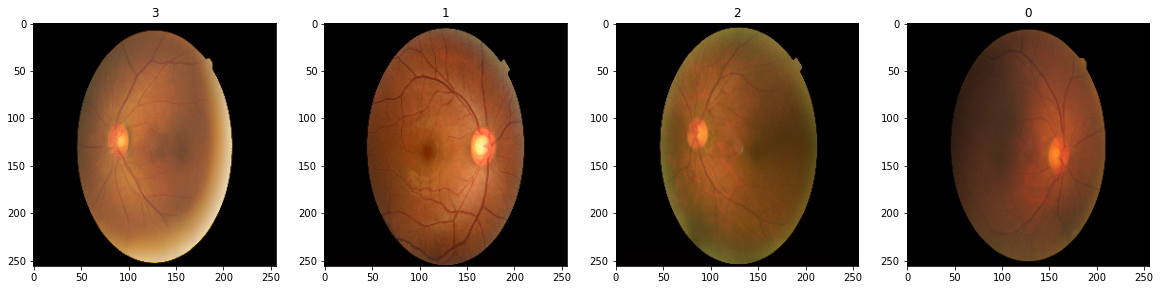

In [10]:
#Batches(normal, cataracta, glaucoma, retina)

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for index, img in enumerate(batch[0][:4]):
    ax[index].imshow(img.astype(int))
    ax[index].title.set_text(batch[1][index])

In [11]:
#Fim

# Pre processamento dos dados

Dividing our pixels images values by the maximium scale to be between 0 and 1 instead of 0 to 255, it will improve the model performance in time of train

x - imagens

y - labels(target variables)

In [12]:
data = data.map(lambda x,y: (x/255, y))

In [13]:
#pick up the first batch in the dataset
data.as_numpy_iterator().next()

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.00220588, 0.        , 0.        ],
          ...,
          [0.00661765, 0.00220588, 0.00392157],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.0001685 , 0.        , 0.        ],
          [0.00392157, 0.00344669, 0.00344669],
          [0.00160846, 0.        , 0.        ],
          ...,
          [0.00010723, 0.        , 0.        ],
          [0.0002451 , 0.        , 0.        ],
          [0.0013174 , 0.        , 0.        ]],
 
         [[0.00323223, 0.00323223, 0.00323223],
          [0.00010723, 0.        , 0.0002451 ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.00784314, 0.        , 0.00392157],
          [0.00784

# Dividir os Dados em Treino e Teste e Validacao

In [15]:
#Dividing the data into: 70% for train, 20% for validation, and 10% for test
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)